In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

In [3]:
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

### 데이터 불러오기

In [4]:
salary = pd.read_csv('./Data/salary_remove.csv')
salary.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2014,1,D,발달상권,1001238,서울 동대문구 청량리역,CS300025,자전거 및 기타운송장비,3825438,77,...,0,0,77,0,0,0,77,0,0,1
1,2014,1,A,골목상권,1000452,충정로6길,CS200031,세탁소,4435088,56,...,0,56,0,0,0,56,0,0,0,1
2,2014,1,D,발달상권,1001051,보라매공원,CS300014,신발,6285714,57,...,0,28,29,0,28,29,0,0,0,19
3,2014,1,A,골목상권,1000510,곰달래로3길,CS300017,시계및귀금속,1063183,15,...,0,15,0,0,0,0,0,0,15,1
4,2014,1,A,골목상권,1000896,논현로115길,CS300031,가구,34411201,36,...,0,36,0,0,0,0,0,36,0,2


In [5]:
salary.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

### 상권 구분 코드 별로 분포 확인 후 , 나누어서 할지 같이 해도 될지 판단하기
- 상권 구분 코드 별로 분포가 상이하다는 것을 볼 수 있다. 그러므로 상권 구분 코드별로 각각의 데이터셋을 만들어서 판단하기로 했다. <br><br>

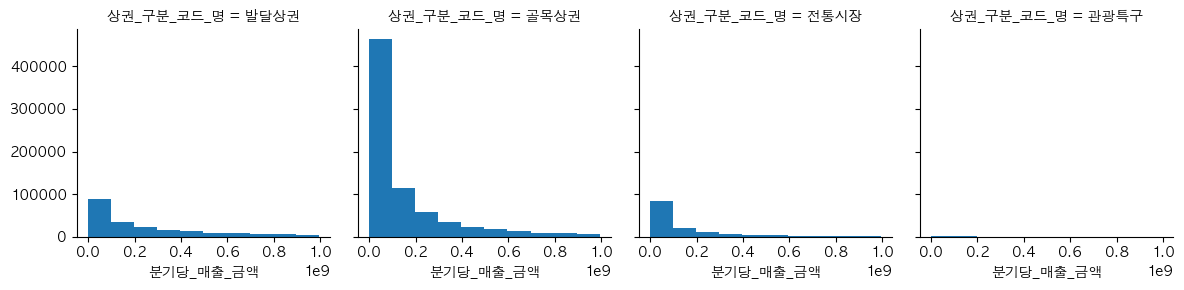

In [6]:
g = sns.FacetGrid(
    data=salary,
    col='상권_구분_코드_명'
)

g.map(plt.hist,'분기당_매출_금액')

plt.show()

### 데이터셋 나누기

In [7]:
bal_dal = salary[salary['상권_구분_코드_명'] == '발달상권']
gol_mok = salary[salary['상권_구분_코드_명'] == '골목상권']
si_jang = salary[salary['상권_구분_코드_명'] == '전통시장']
travel = salary[salary['상권_구분_코드_명'] == '관광특구']

### 데이터셋 별로 히스토그램과 데이터셋 개수 비율의 파이차트
- 상권 구분 별로 데이터셋의 차이가 확연히 많이 난다는 것을 확인 할 수 있다. <br><br>
- 그렇기 때문에 이를 다같이 해서 분석했을 경우, 가장 높은 비율의 골목상권의 분기별 매출 특성에 맞춰져서 예측이 되게 되기 때문에 이를 나누어서 분석해야 된다는 결론을 내렸다. <br><br>

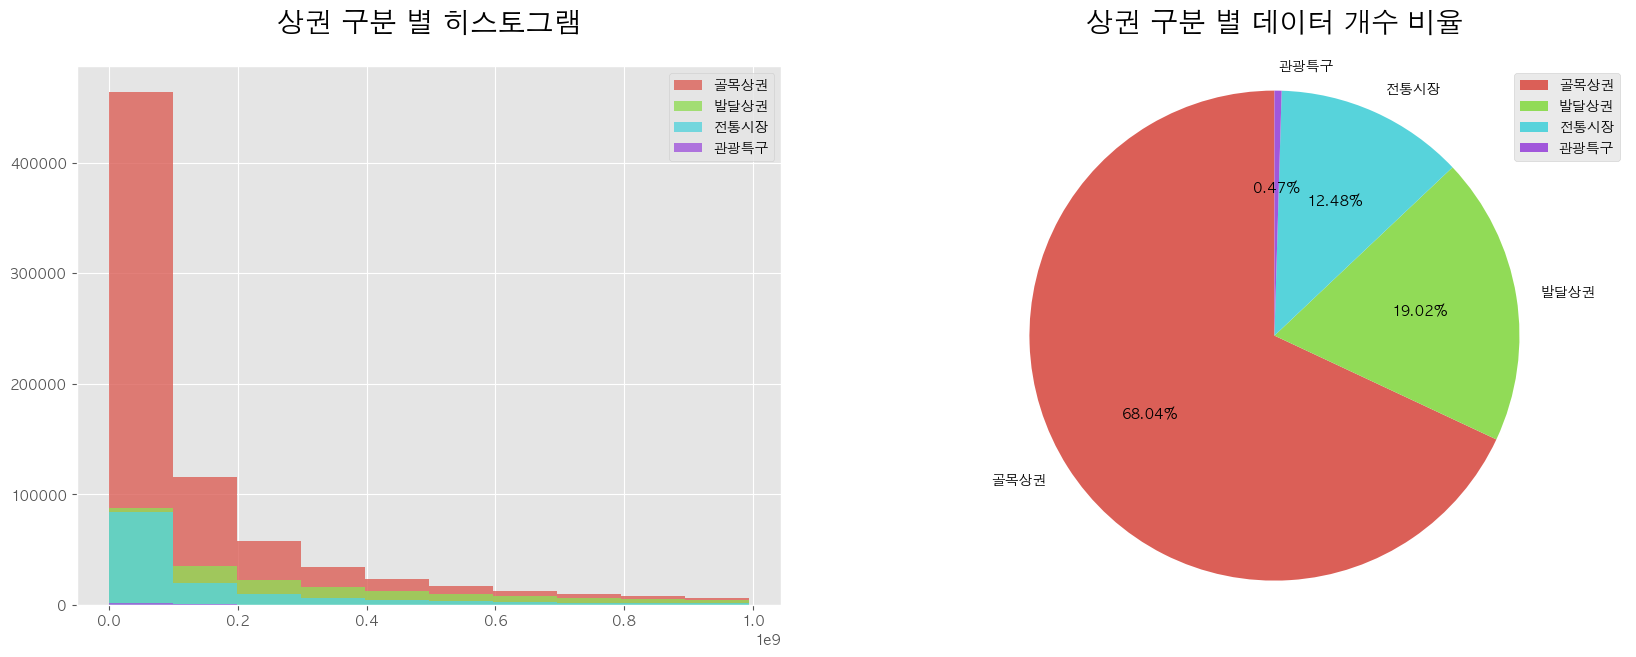

In [8]:
plt.style.use('ggplot')

fig , axs = plt.subplots(1,2,figsize=(20,7))

colors = sns.color_palette('hls',len(salary['상권_구분_코드_명'].unique()))

axs[0].hist(
    gol_mok['분기당_매출_금액'],
    alpha=0.8,
    label='골목상권',
    color=colors[0]
)

axs[0].hist(
    bal_dal['분기당_매출_금액'],
    alpha=0.8,
    label='발달상권',
    color=colors[1]
)

axs[0].hist(
    si_jang['분기당_매출_금액'],
    alpha=0.8,
    label='전통시장',
    color=colors[2]
)

axs[0].hist(
    travel['분기당_매출_금액'],
    alpha=0.8,
    label='관광특구',
    color=colors[3]
)

salary['상권_구분_코드_명'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%', # 소수 두째짜리까지 나타내고 %를 붙인다. 
    startangle=90,
    colors=colors,
    ax=axs[1]
)

axs[0].legend(loc='best')
axs[1].legend(loc='best')

axs[1].set_ylabel('')
axs[1].axis('equal')

axs[0].set_title('상권 구분 별 히스토그램',size=20,pad=25)
axs[1].set_title('상권 구분 별 데이터 개수 비율',size=20,pad=25)

plt.show()

### 데이터셋 나눈거 따로따로 저장하기

In [9]:
gol_mok.to_csv('./Data/gol_mok.csv',index=False)
bal_dal.to_csv('./Data/bal_dal.csv',index=False)
si_jang.to_csv('./Data/si_jang.csv',index=False)
travel.to_csv('./Data/travel.csv',index=False)